## Question3. How does the number of people flying between different locations change over time? 

In [2]:
import sqlite3
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [3]:
#change to the direectory where the files are stored
os.chdir('C:\\Users\\juhyu\\OneDrive\\Desktop\\JH\\SIM\\Year2\\Programming for data science\\Coursework material\\dataverse_files')

In [4]:
# ====== create tables ======
airline2003=pd.read_csv('2003.csv.bz2', compression='bz2', low_memory=False,error_bad_lines=False,skiprows=lambda x: x%2 ==1)
airline2004=pd.read_csv('2004.csv.bz2', compression='bz2', low_memory=False,error_bad_lines=False,skiprows=lambda x: x%2 ==1)
airline2005=pd.read_csv('2005.csv.bz2', compression='bz2', low_memory=False,error_bad_lines=False,skiprows=lambda x: x%2 ==1)

C:\Users\juhyu\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


In [5]:
frames=[airline2003,airline2004,airline2005]
df=pd.concat(frames)
df

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2003,1,30,4,1654.0,1655,1910.0,1913,UA,1017,...,2,26,0,NaN,0,NaN,NaN,NaN,NaN,NaN
1,2003,1,1,3,1033.0,1035,1625.0,1634,UA,1018,...,6,11,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2,2003,1,3,5,1031.0,1035,1640.0,1634,UA,1018,...,13,13,0,NaN,0,NaN,NaN,NaN,NaN,NaN
3,2003,1,5,7,1035.0,1035,1636.0,1634,UA,1018,...,5,9,0,NaN,0,NaN,NaN,NaN,NaN,NaN
4,2003,1,1,3,1713.0,1710,1851.0,1847,UA,1020,...,7,29,0,NaN,0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3570293,2005,12,22,4,758.0,759,1247.0,1241,DL,895,...,6,14,0,NaN,0,0.0,0.0,0.0,0.0,0.0
3570294,2005,12,22,4,1256.0,1300,1306.0,1311,DL,897,...,6,22,0,NaN,0,0.0,0.0,0.0,0.0,0.0
3570295,2005,12,22,4,1652.0,1655,1815.0,1837,DL,901,...,7,15,0,NaN,0,0.0,0.0,0.0,0.0,0.0
3570296,2005,12,22,4,1507.0,1511,1641.0,1649,DL,903,...,4,29,0,NaN,0,0.0,0.0,0.0,0.0,0.0


In [6]:
#Getting the column names in dataframe
df.columns

Index(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime',
       'ArrTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum', 'TailNum',
       'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut',
       'Cancelled', 'CancellationCode', 'Diverted', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay'],
      dtype='object')

In [7]:
airports=pd.read_csv('airports.csv')

In [8]:
airports.columns

Index(['iata', 'airport', 'city', 'state', 'country', 'lat', 'long'], dtype='object')

In [9]:
airports=airports.rename(columns={'iata':'Origin'})

In [10]:
airports=airports[['Origin','airport','city','country']]

In [11]:
airports.columns

Index(['Origin', 'airport', 'city', 'country'], dtype='object')

In [12]:
df.columns

Index(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime',
       'ArrTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum', 'TailNum',
       'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut',
       'Cancelled', 'CancellationCode', 'Diverted', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay'],
      dtype='object')

In [13]:
data3=pd.merge(df,airports,how='left')
data3

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,airport,city,country
0,2003,1,30,4,1654.0,1655,1910.0,1913,UA,1017,...,NaN,0,NaN,NaN,NaN,NaN,NaN,Chicago O'Hare International,Chicago,USA
1,2003,1,1,3,1033.0,1035,1625.0,1634,UA,1018,...,NaN,0,NaN,NaN,NaN,NaN,NaN,Metropolitan Oakland International,Oakland,USA
2,2003,1,3,5,1031.0,1035,1640.0,1634,UA,1018,...,NaN,0,NaN,NaN,NaN,NaN,NaN,Metropolitan Oakland International,Oakland,USA
3,2003,1,5,7,1035.0,1035,1636.0,1634,UA,1018,...,NaN,0,NaN,NaN,NaN,NaN,NaN,Metropolitan Oakland International,Oakland,USA
4,2003,1,1,3,1713.0,1710,1851.0,1847,UA,1020,...,NaN,0,NaN,NaN,NaN,NaN,NaN,Washington Dulles International,Chantilly,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10379198,2005,12,22,4,758.0,759,1247.0,1241,DL,895,...,NaN,0,0.0,0.0,0.0,0.0,0.0,Denver Intl,Denver,USA
10379199,2005,12,22,4,1256.0,1300,1306.0,1311,DL,897,...,NaN,0,0.0,0.0,0.0,0.0,0.0,William B Hartsfield-Atlanta Intl,Atlanta,USA
10379200,2005,12,22,4,1652.0,1655,1815.0,1837,DL,901,...,NaN,0,0.0,0.0,0.0,0.0,0.0,William B Hartsfield-Atlanta Intl,Atlanta,USA
10379201,2005,12,22,4,1507.0,1511,1641.0,1649,DL,903,...,NaN,0,0.0,0.0,0.0,0.0,0.0,William B Hartsfield-Atlanta Intl,Atlanta,USA


##### Plot of number of flights throughout the years

In [15]:
my_colors=['#5CACEE']

In [16]:
#counting the number of flights per year
df['Year'].groupby(df['Year']).agg('count')

Year
2003    3244270
2004    3564635
2005    3570298
Name: Year, dtype: int64

<AxesSubplot:xlabel='Year'>

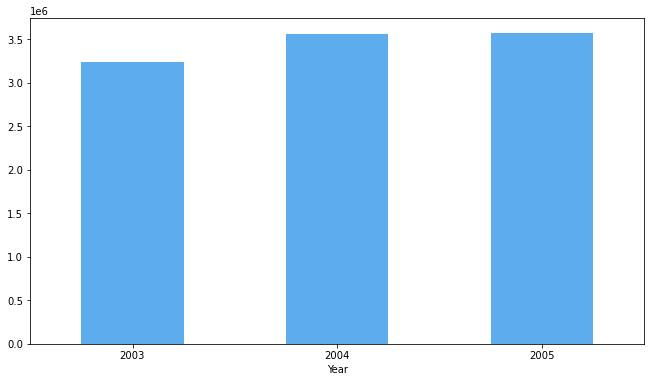

In [17]:
df['Year'].groupby(df['Year']).agg('count').plot(kind='bar',rot=0,figsize=(11,6),color=my_colors)

##### From the statistics and graph, we can see that number of people flying (number of flights) is increasing from 2003 to 2005. 
##### To investigate in deep, we will scrutinize into trend in number of flights in airports with top five number of flights.

In [18]:
df['Origin']

0          ORD
1          OAK
2          OAK
3          OAK
4          IAD
          ... 
3570293    DEN
3570294    ATL
3570295    ATL
3570296    ATL
3570297    ORD
Name: Origin, Length: 10379203, dtype: object

In [19]:
df['Origin'].unique()

array(['ORD', 'OAK', 'IAD', 'BOS', 'SAN', 'SJC', 'DEN', 'BUF', 'STL',
       'PDX', 'CLE', 'TPA', 'DAY', 'EWR', 'ATL', 'DTW', 'LAS', 'AUS',
       'IND', 'OKC', 'BOI', 'DFW', 'PHL', 'SFO', 'PHX', 'SEA', 'MCI',
       'MHT', 'IAH', 'ONT', 'GEG', 'GRR', 'PIT', 'MIA', 'SLC', 'SYR',
       'BIL', 'TUS', 'PVD', 'BUR', 'MSP', 'CMH', 'MCO', 'ABQ', 'DSM',
       'LAX', 'MSY', 'RSW', 'SMF', 'RNO', 'OMA', 'TUL', 'BDL', 'BWI',
       'JAC', 'CVG', 'ALB', 'ROC', 'SNA', 'EUG', 'SAT', 'ICT', 'CLT',
       'MDT', 'GSO', 'HDN', 'BTV', 'FLL', 'RIC', 'COS', 'MFR', 'PBI',
       'ANC', 'CID', 'LIH', 'KOA', 'OGG', 'HNL', 'SJU', 'STT', 'JFK',
       'GUC', 'MTJ', 'DCA', 'LGA', 'CHS', 'ILM', 'PNS', 'MEM', 'MYR',
       'BNA', 'BHM', 'SAV', 'RDU', 'ABE', 'ORF', 'SRQ', 'MKE', 'JAX',
       'PWM', 'AVP', 'STX', 'AMA', 'CRP', 'DAL', 'ELP', 'HOU', 'HRL',
       'ISP', 'JAN', 'LBB', 'LIT', 'MAF', 'MDW', 'SDF', 'BGR', 'DLH',
       'MOT', 'GFK', 'RST', 'MSN', 'LAN', 'VPS', 'MBS', 'FNT', 'FAR',
       'FSD', 'BIS',

In [20]:
origin_counts=pd.Series(df['Origin'].value_counts())
origin_counts

ATL    609931
ORD    540258
DFW    492722
LAX    343780
IAH    299194
        ...  
PVU         2
OGD         2
FMN         2
BFF         1
CYS         1
Name: Origin, Length: 293, dtype: int64

In [21]:
#Counting the number of flights from different origin airports
origin_counts=dict(origin_counts)
origin_counts

{'ATL': 609931,
 'ORD': 540258,
 'DFW': 492722,
 'LAX': 343780,
 'IAH': 299194,
 'PHX': 257420,
 'CVG': 254251,
 'DEN': 239498,
 'LAS': 234520,
 'EWR': 232098,
 'MSP': 214594,
 'SLC': 211857,
 'DTW': 211071,
 'SFO': 190673,
 'BOS': 188069,
 'LGA': 181321,
 'IAD': 179202,
 'PHL': 178288,
 'CLT': 163042,
 'MCO': 160362,
 'SEA': 160185,
 'BWI': 156185,
 'DCA': 138537,
 'CLE': 136442,
 'MDW': 135342,
 'JFK': 134110,
 'SAN': 128926,
 'STL': 114202,
 'TPA': 109016,
 'OAK': 104222,
 'FLL': 98665,
 'MIA': 96333,
 'SJC': 93267,
 'PIT': 90028,
 'RDU': 88158,
 'BNA': 87430,
 'MCI': 87345,
 'HOU': 86605,
 'PDX': 83415,
 'MEM': 73752,
 'SMF': 73103,
 'MSY': 73052,
 'SNA': 71392,
 'DAL': 66436,
 'IND': 63384,
 'AUS': 61360,
 'SAT': 58573,
 'CMH': 56091,
 'ABQ': 55351,
 'ONT': 53898,
 'BDL': 52714,
 'PVD': 44931,
 'HNL': 44754,
 'JAX': 43592,
 'RNO': 43302,
 'BUR': 41138,
 'PBI': 40497,
 'SJU': 38335,
 'BUF': 38227,
 'ORF': 34302,
 'SDF': 34142,
 'MHT': 33941,
 'RSW': 33640,
 'OKC': 33454,
 'TUL': 32

In [22]:
top5_origin=list(origin_counts.keys())[:5]
top5_origin

['ATL', 'ORD', 'DFW', 'LAX', 'IAH']

In [23]:
#getting full airport name
airports.loc[airports['Origin'].isin(top5_origin)]

,Origin,airport,city,country
880,ATL,William B Hartsfield-Atlanta Intl,Atlanta,USA
1268,DFW,Dallas-Fort Worth International,Dallas-Fort Worth,USA
1837,IAH,George Bush Intercontinental,Houston,USA
2039,LAX,Los Angeles International,Los Angeles,USA
2531,ORD,Chicago O'Hare International,Chicago,USA


Top 5 airports with highest number of flights are: 'ATL','ORD','DFW','LAX','IAH'.

In [24]:
flights_peryear=df['Year'].groupby(df['Origin']).value_counts().to_frame()

In [25]:
flights_peryear

Year
Origin Year      
ABE    2004  3381
       2005  2372
       2003  2034
ABI    2004  1538
       2005  1375
...           ...
YAK    2005   365
       2003   360
YUM    2003   697
       2004   662
       2005   611

[849 rows x 1 columns]

In [26]:
flights_peryear=flights_peryear['Year'].rename('counts').to_frame()

In [27]:
flights_peryear.columns

Index(['counts'], dtype='object')

In [28]:
#turning 'Origin' and 'Year' index to columns to use the values
flights_peryear.reset_index(inplace=True)

In [29]:
flights_peryear

,Origin,Year,counts
0,ABE,2004,3381
1,ABE,2005,2372
2,ABE,2003,2034
3,ABI,2004,1538
4,ABI,2005,1375
...,...,...,...
844,YAK,2005,365
845,YAK,2003,360
846,YUM,2003,697
847,YUM,2004,662


In [30]:
#changing the index to rangeindex
flights_peryear.index=pd.RangeIndex(start=0,stop=849,step=1)

In [31]:
flights_peryear=flights_peryear.loc[flights_peryear['Origin'].isin(top5_origin)]
flights_peryear

,Origin,Year,counts
50,ATL,2005,216626
51,ATL,2004,209071
52,ATL,2003,184234
232,DFW,2004,172483
233,DFW,2003,166376
234,DFW,2005,153863
390,IAH,2005,105937
391,IAH,2004,100657
392,IAH,2003,92600
450,LAX,2004,116322


In [32]:
flights_peryear.reset_index(inplace=True)

In [33]:
flights_peryear['Year'].dtypes

dtype('int64')

In [34]:
flights_peryear['Year'] = flights_peryear['Year'].astype(str)

C:\Users\juhyu\AppData\Local\Temp/ipykernel_1880/134537839.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  flights_peryear['Year'] = flights_peryear['Year'].astype(str)


In [35]:
flights_peryear['Year'].unique()[::-1]

array(['2003', '2004', '2005'], dtype=object)

In [36]:
#define index column
flights_peryear.set_index('Origin', inplace=True)

In [37]:
flights_peryear=flights_peryear.drop(columns=['index'])

In [38]:
flights_peryear

,Year,counts
Origin,,
ATL,2005,216626
ATL,2004,209071
ATL,2003,184234
DFW,2004,172483
DFW,2003,166376
DFW,2005,153863
IAH,2005,105937
IAH,2004,100657
IAH,2003,92600


In [39]:
flights2003=flights_peryear.loc[flights_peryear['Year']=='2003'].drop(columns=['Year'])
flights2004=flights_peryear.loc[flights_peryear['Year']=='2004'].drop(columns=['Year'])
flights2005=flights_peryear.loc[flights_peryear['Year']=='2005'].drop(columns=['Year'])

In [40]:
flights2003=flights2003['counts'].rename('2003').to_frame()
flights2004=flights2004['counts'].rename('2004').to_frame()
flights2005=flights2005['counts'].rename('2005').to_frame()

In [41]:
hist_data=pd.concat([flights2003,flights2004,flights2005],axis=1)

In [42]:
hist_data

,2003,2004,2005
Origin,,,
ATL,184234,209071,216626
DFW,166376,172483,153863
IAH,92600,100657,105937
LAX,112001,116322,115457
ORD,183755,187653,168850


In [43]:
hist_data=hist_data.transpose()
hist_data=hist_data[['ATL','ORD','DFW','LAX','IAH']]

In [44]:
hist_data=hist_data.transpose()

In [45]:
hist_data

,2003,2004,2005
Origin,,,
ATL,184234,209071,216626
ORD,183755,187653,168850
DFW,166376,172483,153863
LAX,112001,116322,115457
IAH,92600,100657,105937


Text(0, 0.5, 'Number of flights')

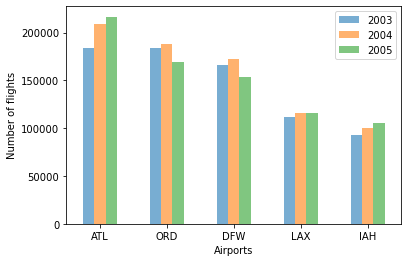

In [46]:
#group data by product and display sales as histogram 

ax=hist_data.plot.bar(rot=0,alpha=0.6)

ax.set_xlabel('Airports')
ax.set_ylabel('Number of flights')

Findings: Number of flights is the highest in 2005 at 3 out of 5 origin airports(ATL,LAX,IAH) and the lowest in 2003 at 3 out of 5 origin airports(ATL,LAX,IAH).

##### Hence, the number of people flying between different locations increased over the years. 